## Basics of plotting

There are two approaches to plotting with `matplotlib`:
1. Functional Approach
2. Object Oriented Approach.

The **Functional** approach is convienient to quickly make single and simple graphs. However, it can get very confusing very soon, as the complexity of the graph increases.

The **Object-Oriented** approach takes some time to get used to. But, it breaks down complicated plots into logical parts that makes it easy to construct them.

We will start with the functional approach. For the purposes of our demonstration we will consider a simple object under free fall.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
time = np.arange(0., 10., 0.2)
velocity = np.zeros_like(time, dtype=float)
distance = np.zeros_like(time, dtype=float)

We know that under free-fall, all objects move with the constant acceleration of 9.8 m/s<sup>2</sup> 

In [3]:
g = 9.8 # m/s^2

velocity = g * time
distance = 0.5 * g * np.power(time, 2)

# for index, vel in enumerate(velocity):
#     velocity[index] = g * time[index] # velocity = acceleration (g) * time

# for index, dis in enumerate(distance):
#     distance[index] = 0.5 * g * time[index]**2 # distance = 0.5 * acceleration (g) * time^2

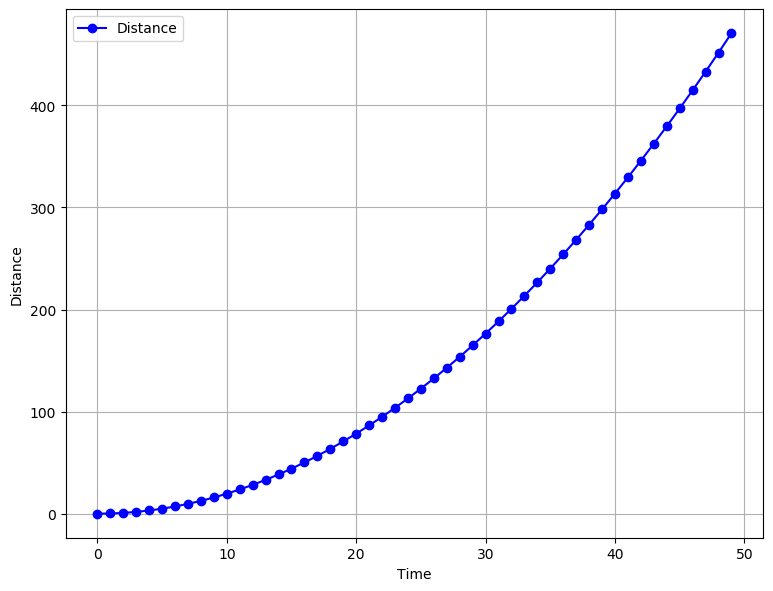

In [4]:
plt.figure(figsize=(9,7), dpi=100)
plt.plot(distance,'bo-')
plt.ylabel("Distance")
plt.xlabel("Time")
plt.legend(["Distance"])
plt.grid(True)

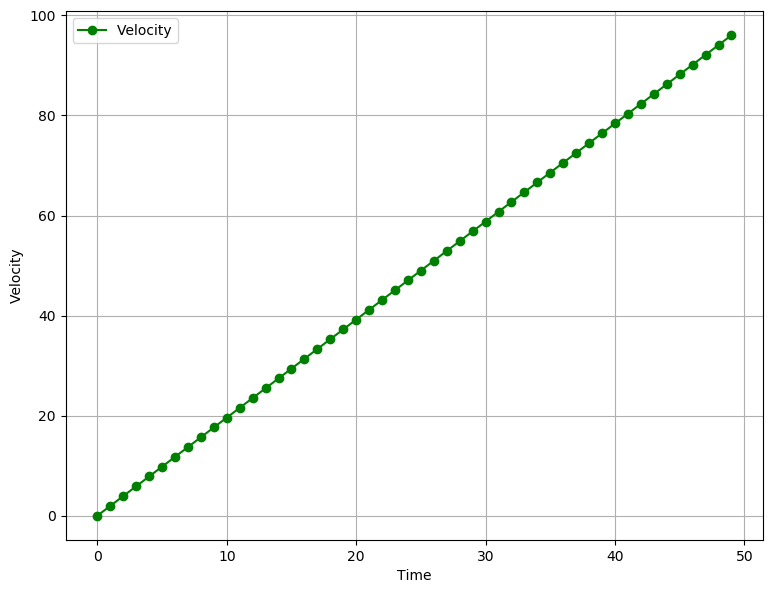

In [5]:
plt.figure(figsize=(9,7), dpi=100)
plt.plot(velocity,'go-')
plt.ylabel("Velocity")
plt.xlabel("Time")
plt.legend(["Velocity"])
plt.grid(True)

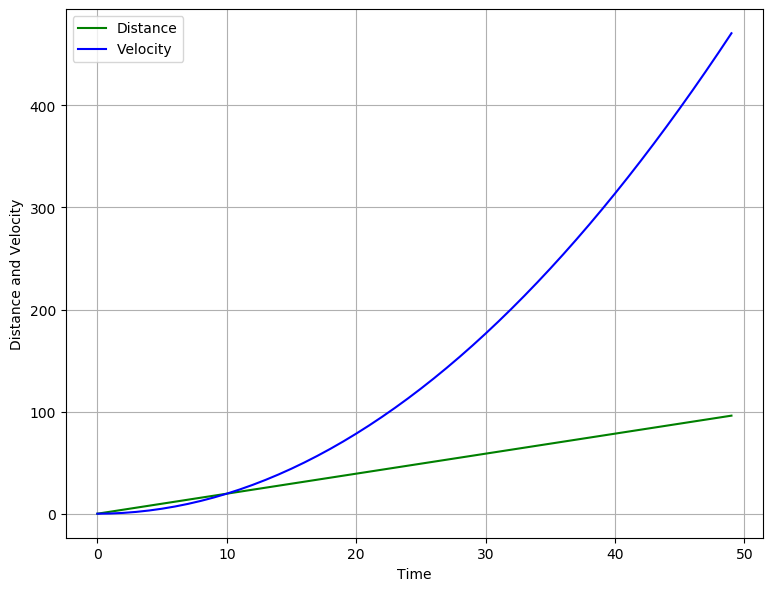

In [6]:
plt.figure(figsize=(9,7), dpi=100)
plt.plot(velocity,'g-')
plt.plot(distance,'b-')
plt.ylabel("Distance and Velocity")
plt.xlabel("Time")
plt.legend(["Distance", "Velocity"])
plt.grid(True)

Now, we immediately run into a serious problem when we try to plot both of the quantities at the same time. The range for the velocity is much smaller than the range for distance. What we need is two different y-axes for each, velocity and distance.

This can be easily achieved using the object oriented approach. The gist of OO approach is that every plot is made of two objects:
1. `figure`
2. `axis`

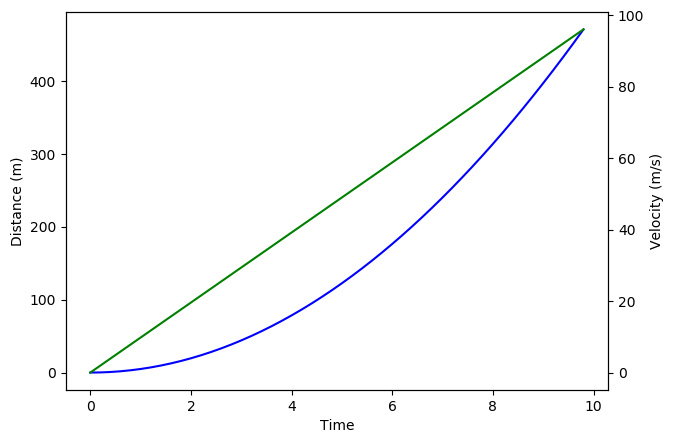

In [11]:
fig, ax1 = plt.subplots()

ax1.set_ylabel("Distance (m)")
ax1.set_xlabel("Time")
ax1.plot(time, distance, "blue")

ax2 = ax1.twinx() # create another y-axis sharing a common x-axis

ax2.set_ylabel("Velocity (m/s)")
ax2.plot(time, velocity, "green")

fig.set_size_inches(7,5)
fig.set_dpi(100)

plt.show()

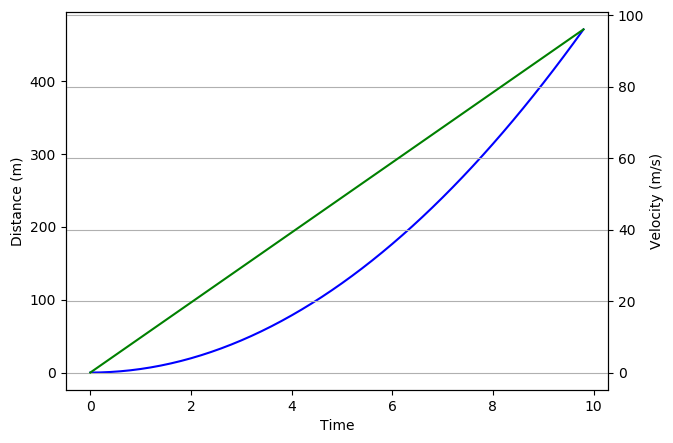

In [10]:
fig, ax1 = plt.subplots()

ax1.set_ylabel("Distance (m)")
ax1.set_xlabel("Time")
ax1.plot(time, distance, "blue")

ax2 = ax1.twinx() # create another y-axis sharing a common x-axis

ax2.set_ylabel("Velocity (m/s)")
ax2.plot(time, velocity, "green")

fig.set_size_inches(7,5)
fig.set_dpi(100)

plt.grid(True)
plt.show()

You may notice that the grid looks weird. It matches with the velocity axis and we are only able to see the horizontal grid lines. This is an expected result, as `matplotlib` is calculating the tick values on it's own. In order, to fix this we will have to calculate the tick values ourselves. We should also add some finishing touches, like changing the color of the axis labels and tick labels and adding a legend.

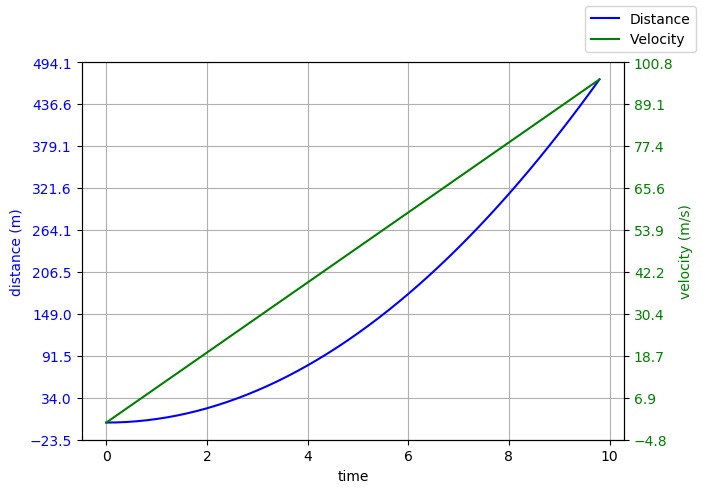

In [12]:
fig, ax1 = plt.subplots()

ax1.set_ylabel("distance (m)", color="blue")
ax1.set_xlabel("time")
ax1.plot(time, distance, "blue")
ax1.set_yticks(np.linspace(*ax1.get_ybound(), 10))
ax1.tick_params(axis="y", labelcolor="blue")
ax1.xaxis.grid()
ax1.yaxis.grid()

ax2 = ax1.twinx() # create another y-axis sharing a common x-axis

ax2.set_ylabel("velocity (m/s)", color="green")
ax2.set_xlabel("time")

ax2.tick_params(axis="y", labelcolor="green")
ax2.plot(time, velocity, "green")
ax2.set_yticks(np.linspace(*ax2.get_ybound(), 10))

fig.set_size_inches(7,5)
fig.set_dpi(100)
fig.legend(["Distance", "Velocity"])

plt.show()

What sorcery happened in that code, you may ask?

1. `fig, ax1 = plt.subplots()` : We used this command to generate a `figure` and `axes` object.
3. We added the distance data to the axes (`ax1`) object.
4. We then cloned the axes object to create another axis (`ax2`).
5. After which, we populated the cloned object (`ax2`) with the velocity data.
2. Then, we made some changes to the `fig` object, like the figure size and dpi
6. We added some legends.

And, tah-dah, we have ourselves the expected result.

I hope this clarifies the difference in the two approaches.